# Place for plotting stars and constellations for Ellison (Jandal)'s thesis book cover

In [58]:
import numpy as np
from numpy import *
from numpy import nan
# import os
import matplotlib.pyplot as plt
# import astropy
import pandas as pd
# from astropy.io import fits
# from astropy.table import Table
# from astropy.visualization import astropy_mpl_style
# from astropy.utils.data import get_pkg_data_filename
# import matplotlib as mpl
# from matplotlib import pyplot as plt
# from astropy.cosmology import WMAP9 as cosmo
# from astropy.cosmology import FlatLambdaCDM
# import astropy.units as u
# import matplotlib.gridspec as gridspec
# from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
#                                                   mark_inset)
# import matplotlib.cm as cm
# from scipy.stats import spearmanr

# plt.style.use(astropy_mpl_style)

In [74]:
# # # Ravi's path
# path = os.path.expanduser('~/Desktop/')
# stars=pd.read_csv(os.path.expanduser('/Desktop/stars-australia - Sheet1.csv'))

# # # Teresa's path
path = 'stars-australia-Sheet1.csv'
stars = pd.read_csv(path)
stars #I've removed the brackets and nans from the original excel spreadsheet in order for this to work

,name,id,desig,type,morph,con,mag,dim,bv,geometry,stories,role
0,coalsack_nebula,C 99,C 99,dn,NaN,NaN,NaN,430x300,NaN,POINT -167.5 -62.5,emu,emu-head
1,meissa,NaN,lambda,NaN,NaN,orion,3.3298,NaN,-0.160,POINT 83.7845 9.9342,sisters,pursuer
2,bellatrix,NaN,gamma,NaN,NaN,orion,1.5493,NaN,-0.224,POINT 81.2828 6.3497,sisters,pursuer
3,tabit,NaN,pi3,NaN,NaN,orion,3.2862,NaN,0.484,POINT 72.46 6.9613,sisters,pursuer
4,alnitak,NaN,zeta,NaN,NaN,orion,1.6812,NaN,-0.199,POINT 85.1897 -1.9426,"sisters, brothers, thoegay","pursuer, brother, utimal"
...,...,...,...,...,...,...,...,...,...,...,...,...
58,algorab,NaN,delta,NaN,NaN,corvus,2.9449,NaN,-0.012,POINT -172.5339 -16.5154,thoegay,thoegays-RH-fruit
59,minkar,NaN,eta,NaN,NaN,corvus,3.1761,NaN,1.326,POINT -177.4688 -22.6198,thoegay,thoegays-RH-fruit
60,menkent,NaN,theta,NaN,NaN,centaurus,2.2226,NaN,1.011,POINT -148.3294 -36.37,thoegay,thoegays-RH-shoulder?
61,ke kwan,NaN,kappa,NaN,NaN,centaurus,3.0671,NaN,-0.208,POINT -135.2096 -42.1042,thoegay,thoegays-testes


In [60]:
geometry = stars['geometry']

short2 = pd.DataFrame(columns=['Name']) 
short2
for i in range(len(geometry)):
    line = str(stars['geometry'][i]).split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)
short2=short2.drop(['Name'],axis=1)
short2

# Final dataframe for plotting etc - only extracting the important information
df = pd.DataFrame(stars[['name','mag','con','stories','role']])
df['RA'] = short2['B']
df['Dec'] = short2['C'] # adding RA and Dec
df = df[['name','RA','Dec','mag','con','stories','role']] # re-ordering columns; can leave this out
df

,name,RA,Dec,mag,con,stories,role
0,coalsack_nebula,-167.5,-62.5,NaN,NaN,emu,emu-head
1,meissa,83.7845,9.9342,3.3298,orion,sisters,pursuer
2,bellatrix,81.2828,6.3497,1.5493,orion,sisters,pursuer
3,tabit,72.46,6.9613,3.2862,orion,sisters,pursuer
4,alnitak,85.1897,-1.9426,1.6812,orion,"sisters, brothers, thoegay","pursuer, brother, utimal"
...,...,...,...,...,...,...,...
58,algorab,-172.5339,-16.5154,2.9449,corvus,thoegay,thoegays-RH-fruit
59,minkar,-177.4688,-22.6198,3.1761,corvus,thoegay,thoegays-RH-fruit
60,menkent,-148.3294,-36.37,2.2226,centaurus,thoegay,thoegays-RH-shoulder?
61,ke kwan,-135.2096,-42.1042,3.0671,centaurus,thoegay,thoegays-testes


In [61]:
# good point to wrap the co-ordinates seems to be 0deg (based on Ravi's plot below)
# df['RA'] = abs(pd.to_numeric(df['RA'])) # double check this?
df['RA'] = pd.to_numeric(df['RA'])
df['Dec'] = pd.to_numeric(df['Dec'])

df['RA'] = (df['RA'] + 360) % 360 # Wrapping RA co-ords so that RA is between 0 and 360 rather than +/-180

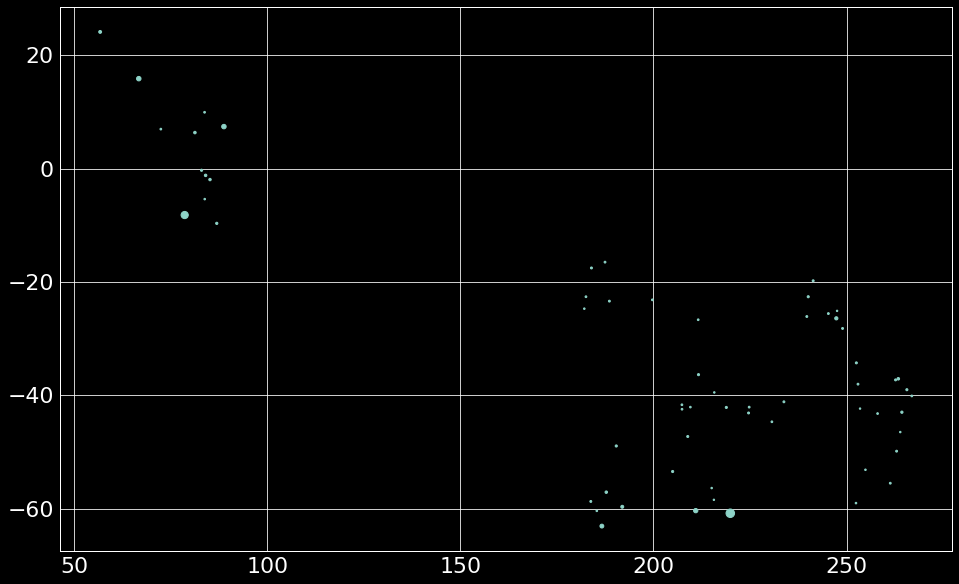

In [72]:
# Plotting

fig,ax = plt.subplots(1,1,figsize=(16,10)) # use (8,5) for smaller plot option
plt.style.use('dark_background') # temporary; to visualise the final plot
ax.scatter(df['RA'], df['Dec'], s=1/df['mag']*10) # marker size based on mag; todo need to re-scale!

# Note: also the cluster around RA 50-100deg and the larger cluster (180-270deg) might need to be plotted 
#    separately at some point

# Ravi's code - old (for now, sorry!)

In [63]:
sisters1=stars[stars['stories']=='sisters']
sisters2=stars[stars['stories']=='sisters, brothers, thoegay']
sisters3=stars[stars['stories']=='sisters, brothers']
sisters4=stars[stars['stories']=='sisters, thoegay']
sisters=pd.concat([sisters1,sisters2,sisters3,sisters4])
sisters
#An example of the constellations. The sisters constellation. We will need to make a new dataframe for each subset (brothers, thoegay, emu etc)

,name,id,desig,type,morph,con,mag,dim,bv,geometry,stories,role
1,meissa,NaN,lambda,NaN,NaN,orion,3.3298,NaN,-0.160,POINT 83.7845 9.9342,sisters,pursuer
2,bellatrix,NaN,gamma,NaN,NaN,orion,1.5493,NaN,-0.224,POINT 81.2828 6.3497,sisters,pursuer
3,tabit,NaN,pi3,NaN,NaN,orion,3.2862,NaN,0.484,POINT 72.46 6.9613,sisters,pursuer
15,hyades,C 41,C 41,oc,ll3m,NaN,0.5000,330,NaN,POINT 66.75 15.8667,sisters,kambugudha
4,alnitak,NaN,zeta,NaN,NaN,orion,1.6812,NaN,-0.199,POINT 85.1897 -1.9426,"sisters, brothers, thoegay","pursuer, brother, utimal"
5,alnilam,NaN,eta,NaN,NaN,orion,1.6235,NaN,-0.184,POINT 84.0534 -1.2019,"sisters, brothers, thoegay","pursuer, brother, utimal"
6,mintaka,NaN,delta,NaN,NaN,orion,2.1361,NaN,-0.175,POINT 83.0017 -0.2991,"sisters, brothers, thoegay","pursuer, brother, utimal"
7,betelgeuse,NaN,alpha,NaN,NaN,orion,0.4997,NaN,1.500,POINT 88.7929 7.4071,"sisters, brothers, thoegay","pursuer, canoe-bow, utimal"
8,rigel,NaN,beta,NaN,NaN,orion,0.1930,NaN,-0.030,POINT 78.6345 -8.2016,"sisters, brothers, thoegay","pursuer, canoe-stern, utimal"
9,orion_nebula,NGC 1976,M 42,bn,"EN+RN; 3, 2, 3",orion,4.0000,NaN,NaN,POINT 83.8221 -5.3911,"sisters, brothers","pursuer, king-fish"


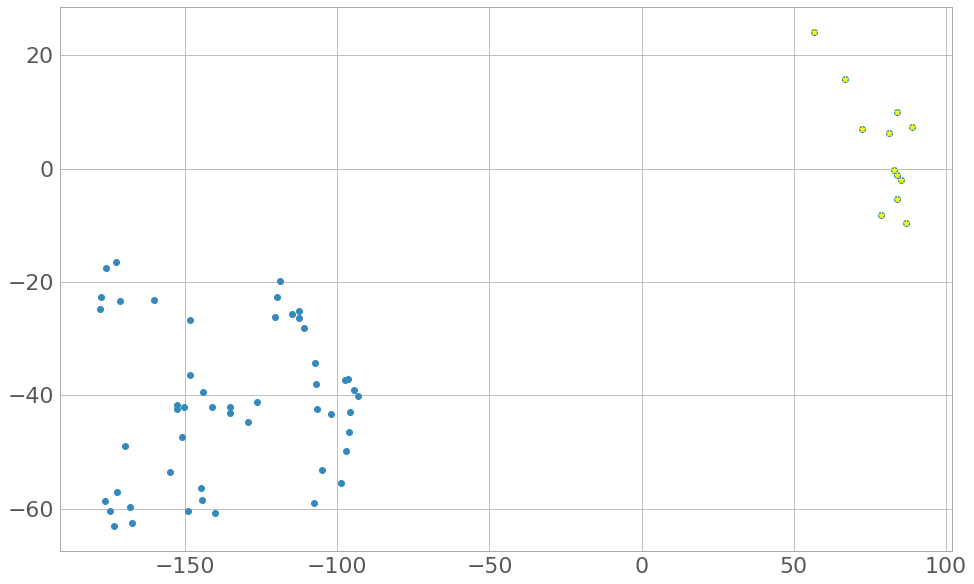

In [64]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
ra = pd.to_numeric(short2['B'])
dec = pd.to_numeric(short2['C'])
mask1_sis = short2.index[sisters.index]
ra2 = ra[mask1_sis]
dec2 = dec[mask1_sis]
# print(ra2)
# ra = float(np.array(SED['B']))
# dec = float(SED['C'])
ax.scatter(ra,dec)
ax.scatter(ra2,dec2,c='yellow',marker='*')